# Mean Reversion -  (Pairs Trading)
- Long Pair: Long stock A and short stock B
- Short Pair: Short stock A and long stock B
- You want to find a high correlation between stock A and B's price (usually > 0.8) --  in this case let's say 0.9. If you find a relationship suggesting that the prices move in opposite directions, you can capitalize on this behavior. ONCE the assets deviate from their typical correlation, say 0.5, you can long/short the pair since you expect the correlation to converge back to its original form.
- Sort of becomes an art when you try to maximize the spread between the assets

![image info](SP.png)

# Basic Idea
- 1) Find 2 assets that move similarly with eachother (whether it be a negative or positive correlation)
- 2) Sell the 'overvalued' stock and buy the 'undervalued' stock
-- A common signal to use to triger the purchase of a pair trade is to use the Price Ratio (Stock A / Stock B). If the ratio changes significantly, then you know it is time to trade. 'Significance' can be measured with standard deviation.

# (Link in the descriptions)
![image info](./Monte_Pic.png)

In [1]:
# Getting Data from 6 years back
# I will use the most recent 1 year to determine how well I would have done if I follow the efficient frontier.
# The market is open 252 times in a given year.
# I will get the adjusted close as my main data.
'''MAKE SURE pandas == 1.2 version.
Yahoo has changed their structure when it comes to querying data. I have made the adjustments to this entire notebook.
'''
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 10, 27), end=datetime(2021, 10, 27)).iloc[:,5])], axis = 1)
#         data = pd.concat([data,pdr.get_data_yahoo(symbols=i, start=datetime(2020, 4, 24), end=datetime(2021, 4, 24)).iloc[:,5]], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","TWTR","GS","XOM","NKE","FEYE", "FB","BRK-B", "MSFT"] #Name of company (Dominos pizza)
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,FEYE,FB,BRK-B,MSFT
Date,,,,,,,,,,,,,,,,,
2021-10-20,576400,58418800,897000,34244800,2276900,49571600,10622000,8485200,5817900,15938400,2453400,14305200,4487000,1174198,13639500,3147600,16537100
2021-10-21,457000,61421000,742500,34794900,2402400,41305400,8437100,8691500,4651500,10918500,2162100,16564600,6121700,1098843,16354400,2488800,16918100
2021-10-22,408600,58839600,1507600,38932100,2797200,58755900,6179700,7069100,7064400,17620900,2408600,14251100,5322400,1647390,35152700,3406500,17440800
2021-10-25,293500,50720600,1054100,47834100,1442800,45214500,3833500,7239100,6429300,15874500,1824700,17939800,3878200,2135086,38409000,3142900,17554500
2021-10-26,362900,60811700,1407900,59128300,2174300,55981300,2902200,10989200,5797800,22340400,1842600,25556400,4710800,1655290,65536000,3872300,27734300


In [2]:
corr_matrix = d.corr()
corr_matrix

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,FEYE,FB,BRK-B,MSFT
DPZ,1.000000,0.337350,0.244875,-0.059019,0.199708,0.354569,0.043019,0.202224,0.205465,0.291313,0.209042,0.243392,0.099190,0.057956,0.209063,0.311668,0.358274
AAPL,0.337350,1.000000,0.633995,-0.008968,0.291835,0.634896,0.197096,0.312437,0.289285,0.285754,0.400270,0.622144,0.137805,0.272363,0.416671,0.578732,0.712752
GOOG,0.244875,0.633995,1.000000,0.034984,0.187214,0.460935,0.256363,0.237250,0.173671,0.340379,0.326406,0.514413,0.177497,0.274308,0.512309,0.544622,0.681750
AMD,-0.059019,-0.008968,0.034984,1.000000,0.003145,0.001404,-0.105137,-0.075672,-0.031276,-0.025878,-0.054045,-0.015123,-0.107300,-0.040280,0.044782,-0.035203,0.076004
GME,0.199708,0.291835,0.187214,0.003145,1.000000,0.081461,0.145596,0.059178,0.117816,0.192625,0.206207,0.179219,-0.029350,0.079014,0.124011,0.124146,0.293324
SPY,0.354569,0.634896,0.460935,0.001404,0.081461,1.000000,0.155413,0.255516,0.344224,0.205558,0.376986,0.547917,0.220514,0.062797,0.365392,0.548532,0.660399
NFLX,0.043019,0.197096,0.256363,-0.105137,0.145596,0.155413,1.000000,0.072673,-0.047420,0.120706,0.233221,0.140776,0.061768,-0.046804,0.217894,0.110997,0.263009
BA,0.202224,0.312437,0.237250,-0.075672,0.059178,0.255516,0.072673,1.000000,0.182427,0.011982,0.222136,0.459486,0.057571,0.029017,0.061480,0.258129,0.331123
WMT,0.205465,0.289285,0.173671,-0.031276,0.117816,0.344224,-0.047420,0.182427,1.000000,0.021722,0.184378,0.264533,0.194815,0.104724,0.087915,0.465114,0.213347
TWTR,0.291313,0.285754,0.340379,-0.025878,0.192625,0.205558,0.120706,0.011982,0.021722,1.000000,0.077671,0.279032,-0.027481,-0.019012,0.381356,0.132702,0.239115


<AxesSubplot:>

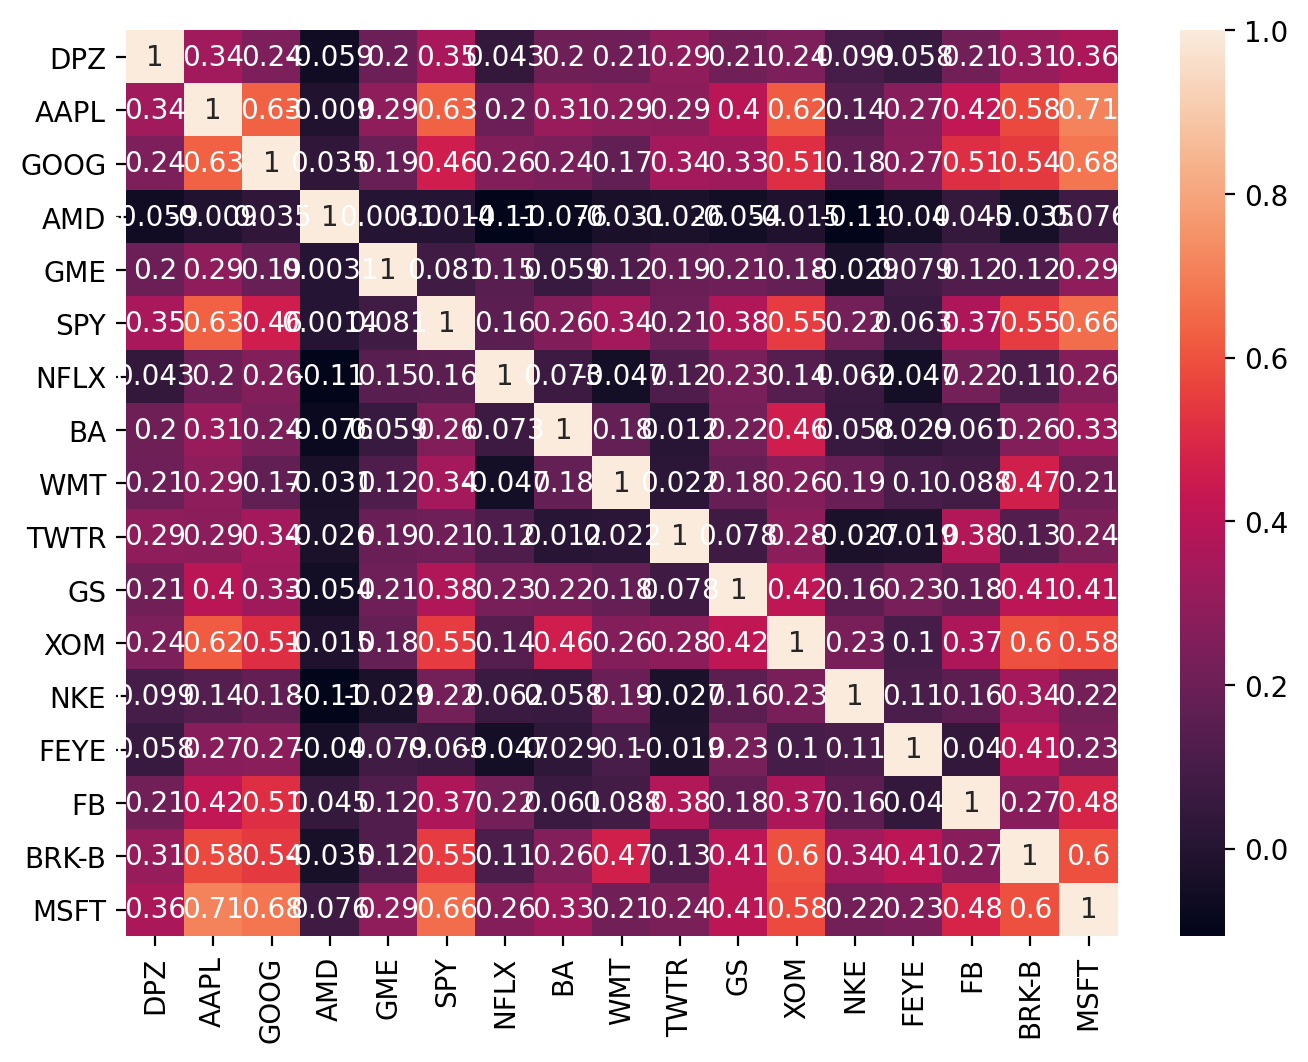

In [3]:
# Let's heatmap this matrix so that we can have a better sense of what is going on
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

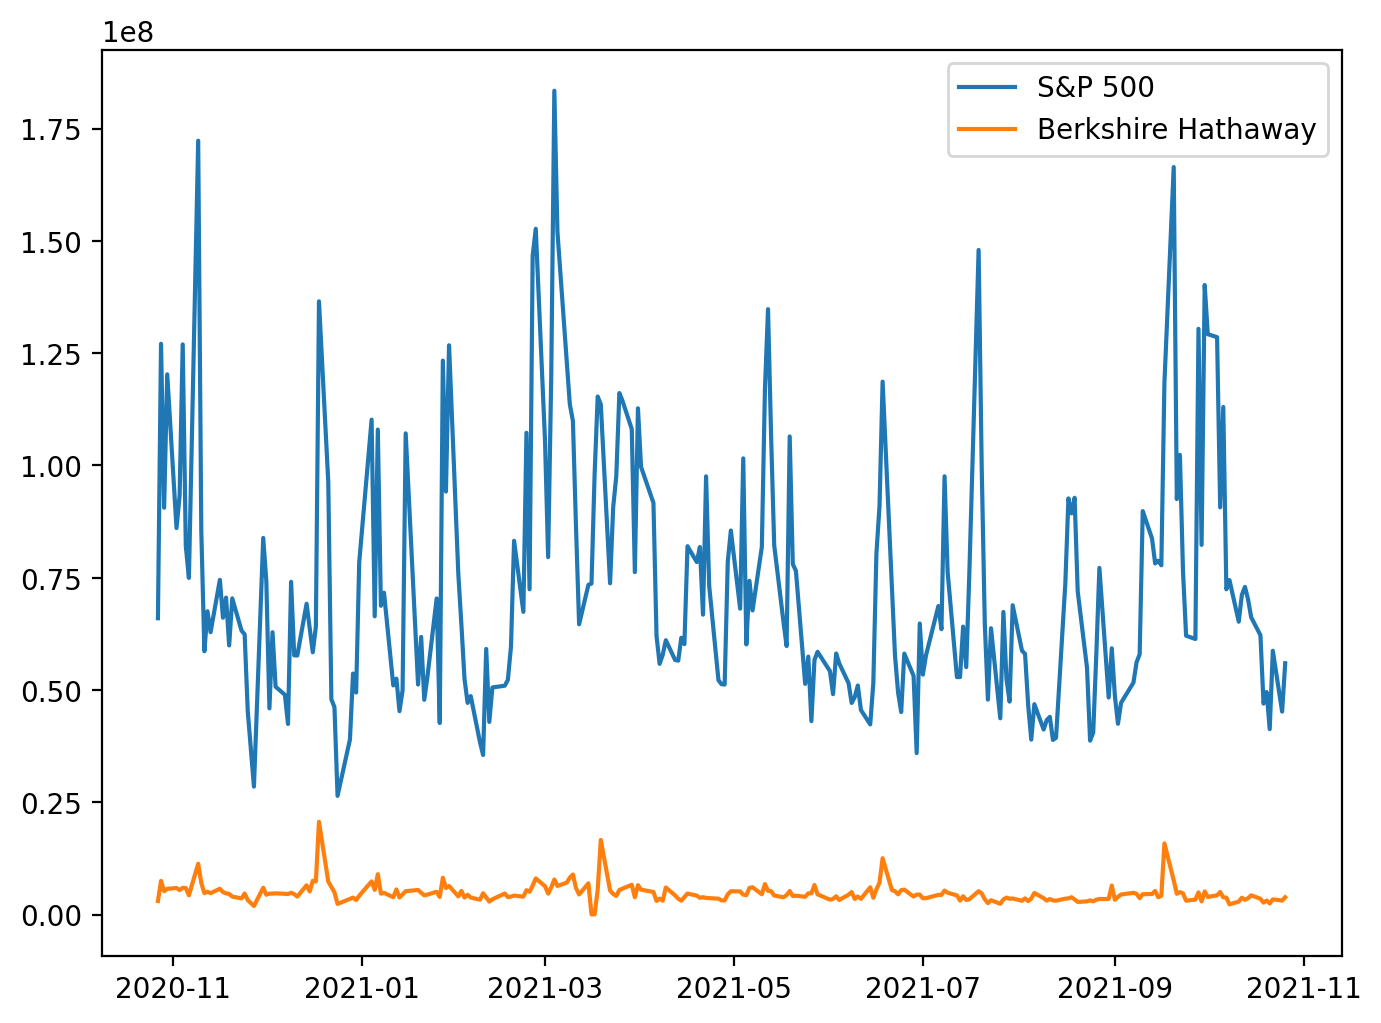

In [4]:
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=200)
SPY = d['SPY'] # S&P 500
BRK_A = d['BRK-B'] # Berkshire Class A share
# HOWEVER, let's check out the relationship between the stocks...
plt.plot(SPY, label = "S&P 500")
plt.plot(BRK_A, label = "Berkshire Hathaway")
plt.legend()
# oh... that's why the correlation seem very high. The data are not 'standardized.'
# Let's look at a different one...

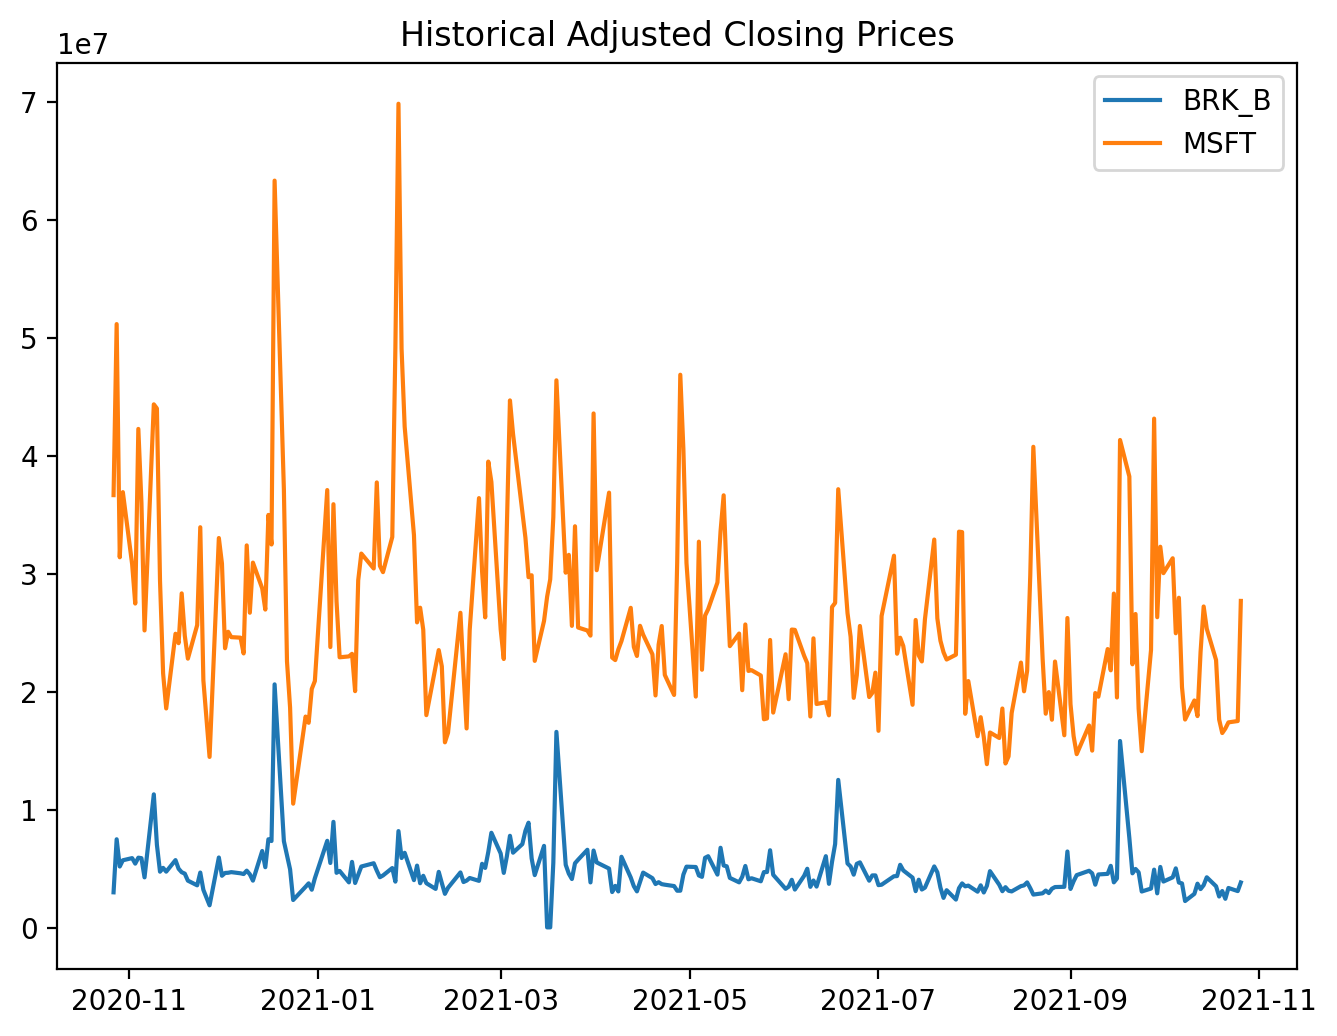

In [5]:
# Correlation of Nike and Apple ~ 0.89.
figure(figsize=(8, 6), dpi=200)
BRK_B = d['BRK-B']
MSFT = d['MSFT']
plt.plot(BRK_B, label = "BRK_B")
plt.plot(MSFT, label = "MSFT")
plt.title('Historical Adjusted Closing Prices')
plt.legend()
# More reasonable.

Text(0.5, 1.0, 'Spread between NIKE and AAPL')

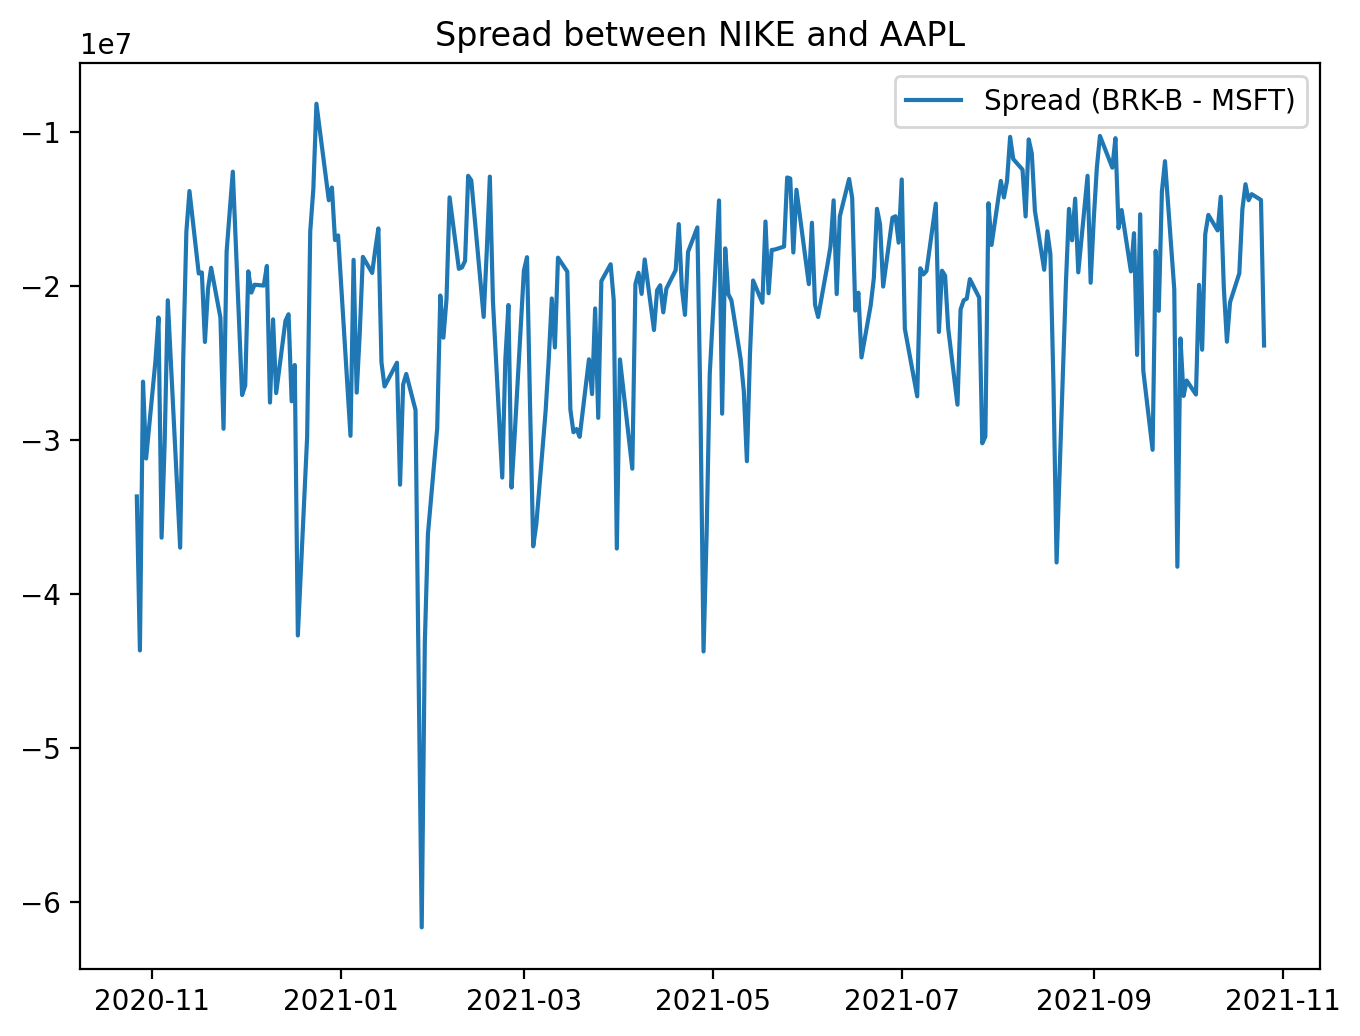

In [6]:
# plot the spread
figure(figsize=(8, 6), dpi=200)
plt.plot(BRK_B - MSFT, label = 'Spread (BRK-B - MSFT)')
plt.legend()
plt.title("Spread between NIKE and AAPL")

In [7]:
# Check out the cointegration value: Null hyp. = no cointegration
import statsmodels.tsa.stattools as ts 
result = ts.coint(BRK_B, MSFT)

In [8]:
# Cointegration test: A technique used to find a potential correlation in a time series (long term)
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.
# Uses the augmented Engle-Granger two-step cointegration test.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 5.2480368989150534e-20


In [9]:
from statsmodels.tsa.stattools import adfuller
# Compute the ADF test for Berkshire Hathaway and Microsoft
# With all time series, you want to have stationary data otherwise our data will be very hard to predict.
# ADF for Berkshire Hathaway Class B
BRK_B_ADF = adfuller(BRK_B)
print('P value for the Augmented Dickey-Fuller Test is', BRK_B_ADF[1])
MSFT_ADF = adfuller(MSFT)
print('P value for the Augmented Dickey-Fuller Test is', MSFT_ADF[1])
Spread_ADF = adfuller(BRK_B - MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(BRK_B / MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
# Spread looks fine. If you'd want even better results, consider taking the difference (order 1) of Berkshire and MSFT

# Results: can only claim stationary for the spread (since P value < 0.05). This suggests a constant mean over time.
# Therefore, the two series are cointegrated.

P value for the Augmented Dickey-Fuller Test is 3.4084728198384804e-20
P value for the Augmented Dickey-Fuller Test is 3.2341814854322007e-13
P value for the Augmented Dickey-Fuller Test is 1.0150381237963187e-12
P value for the Augmented Dickey-Fuller Test is 4.08224342183627e-06


Text(0.5, 1.0, 'Price Ratio between BRK and MSFT')

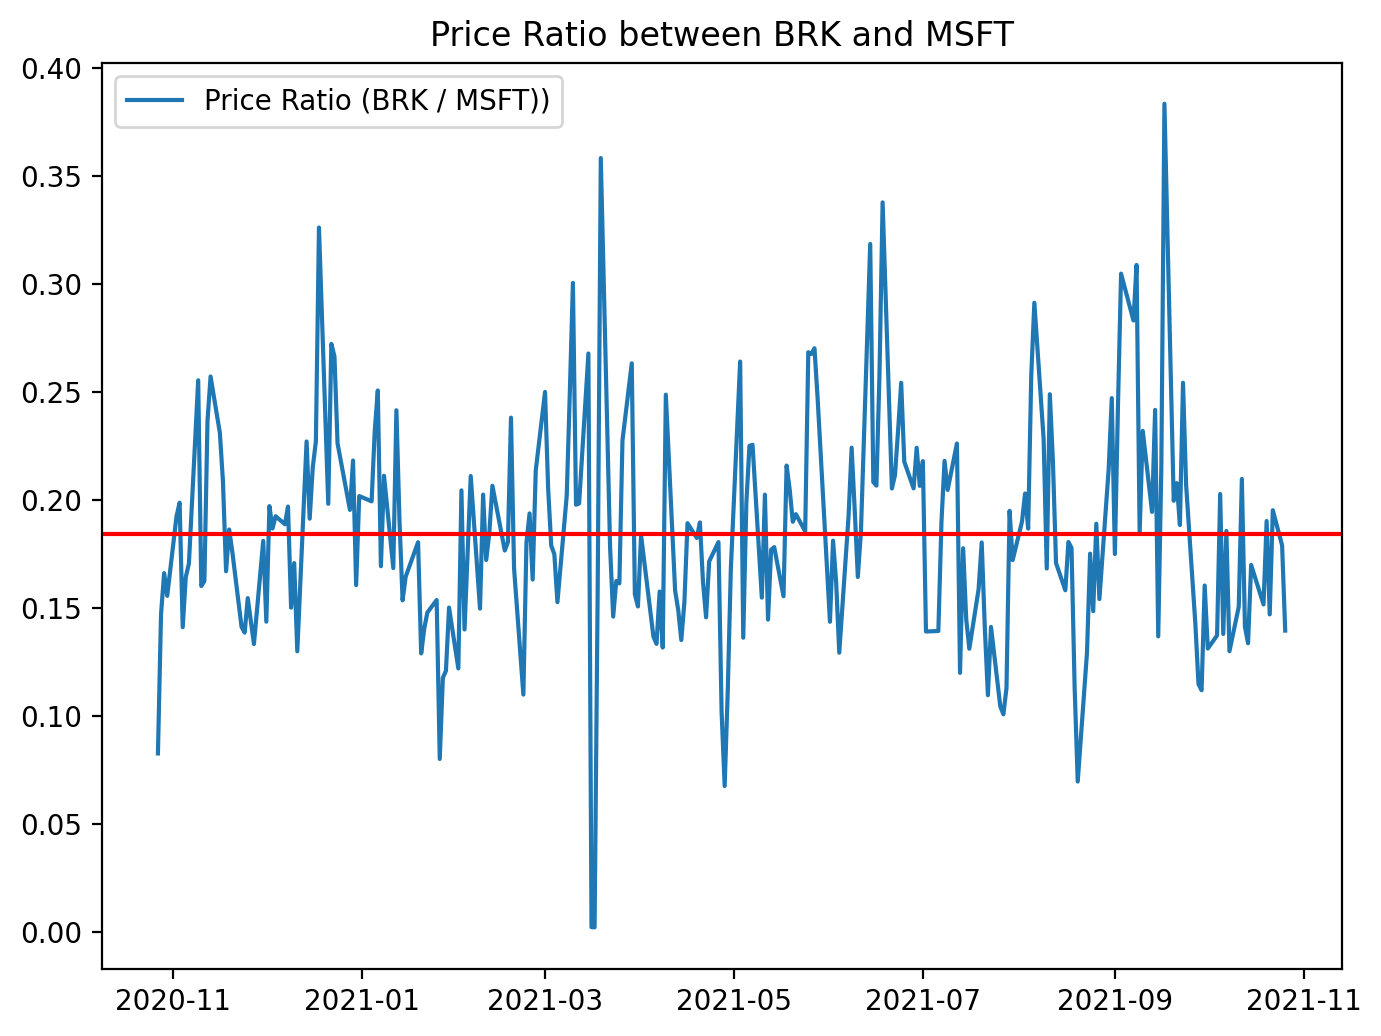

In [10]:
# Also, we can take a look at the price ratios between the two time series.
figure(figsize=(8, 6), dpi=200)
ratio = BRK_B / MSFT
plt.plot(ratio, label = 'Price Ratio (BRK / MSFT))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between BRK and MSFT")

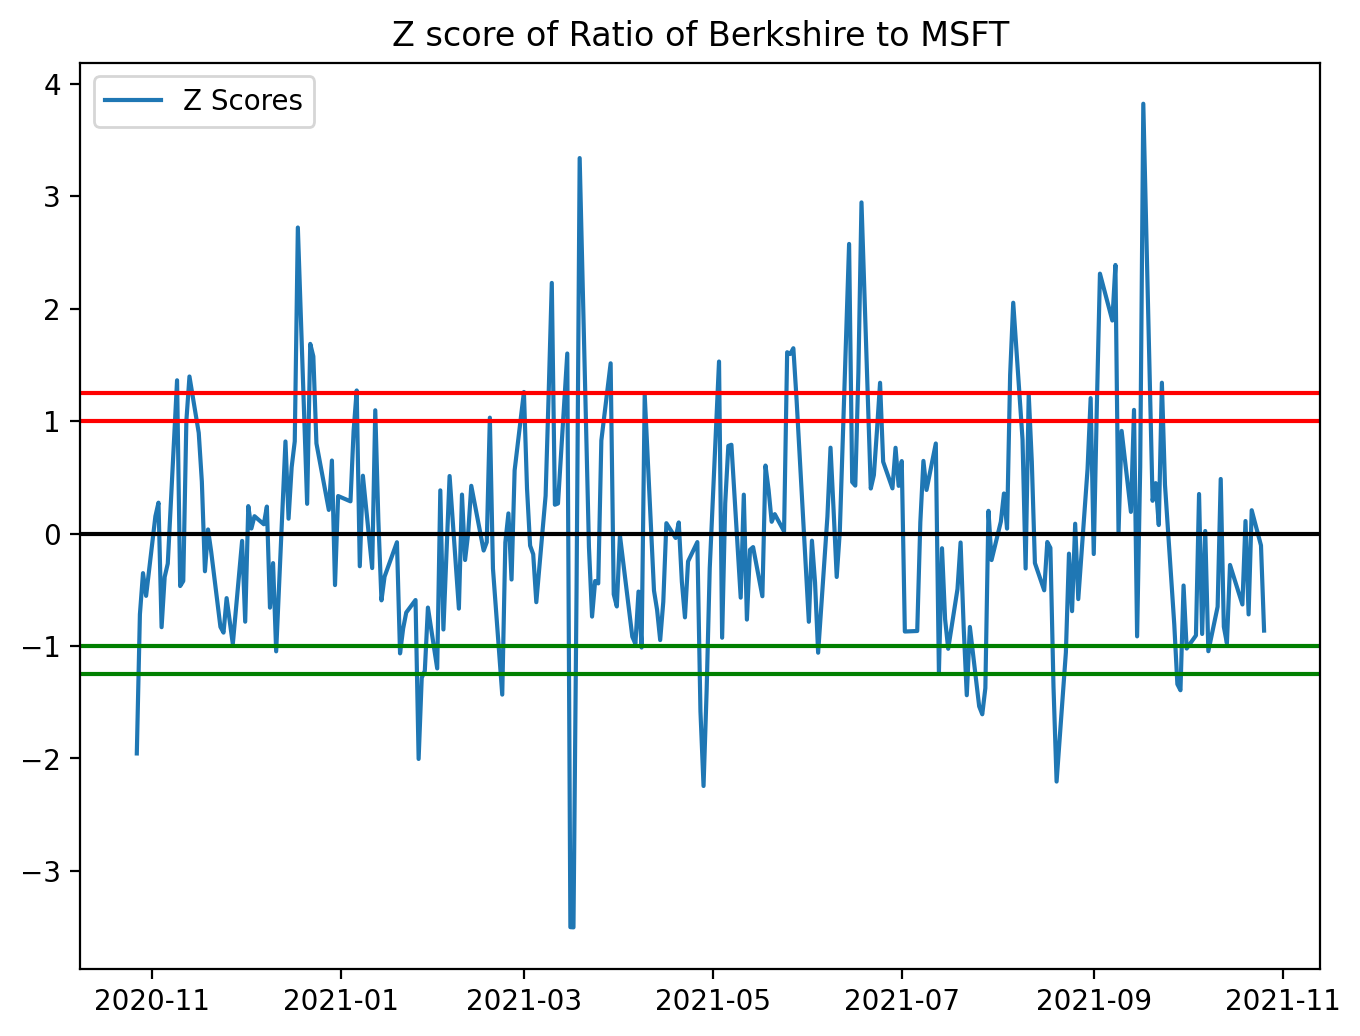

In [11]:
# NOTE, here you can either use the spread OR the Price ratio approach. Anyways, let's standardize the ratio so we can have a 
# upper and lower bound to help evaluate our trends.. Let's stick with the ratio data.
figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of Berkshire to MSFT')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can 
# determine when you can go long or short the pair (BRK_B to MSFT).

In [12]:
# That's cool.. so when do we actually start trading? We need some form of 'signal' to trade (and to trade)
# This is where it can become an 'artform' AND a probability game.

In [13]:
# You could split 80 / 20 for train and test, BUT we are not going to be backtesting since we are just going over the model.
# train = ratio[0:round(0.8*len(ratio))]
# test = ratio[round(0.8*len(ratio)):]
# print('Do the splits check out?',len(train) + len(test) == len(ratio))

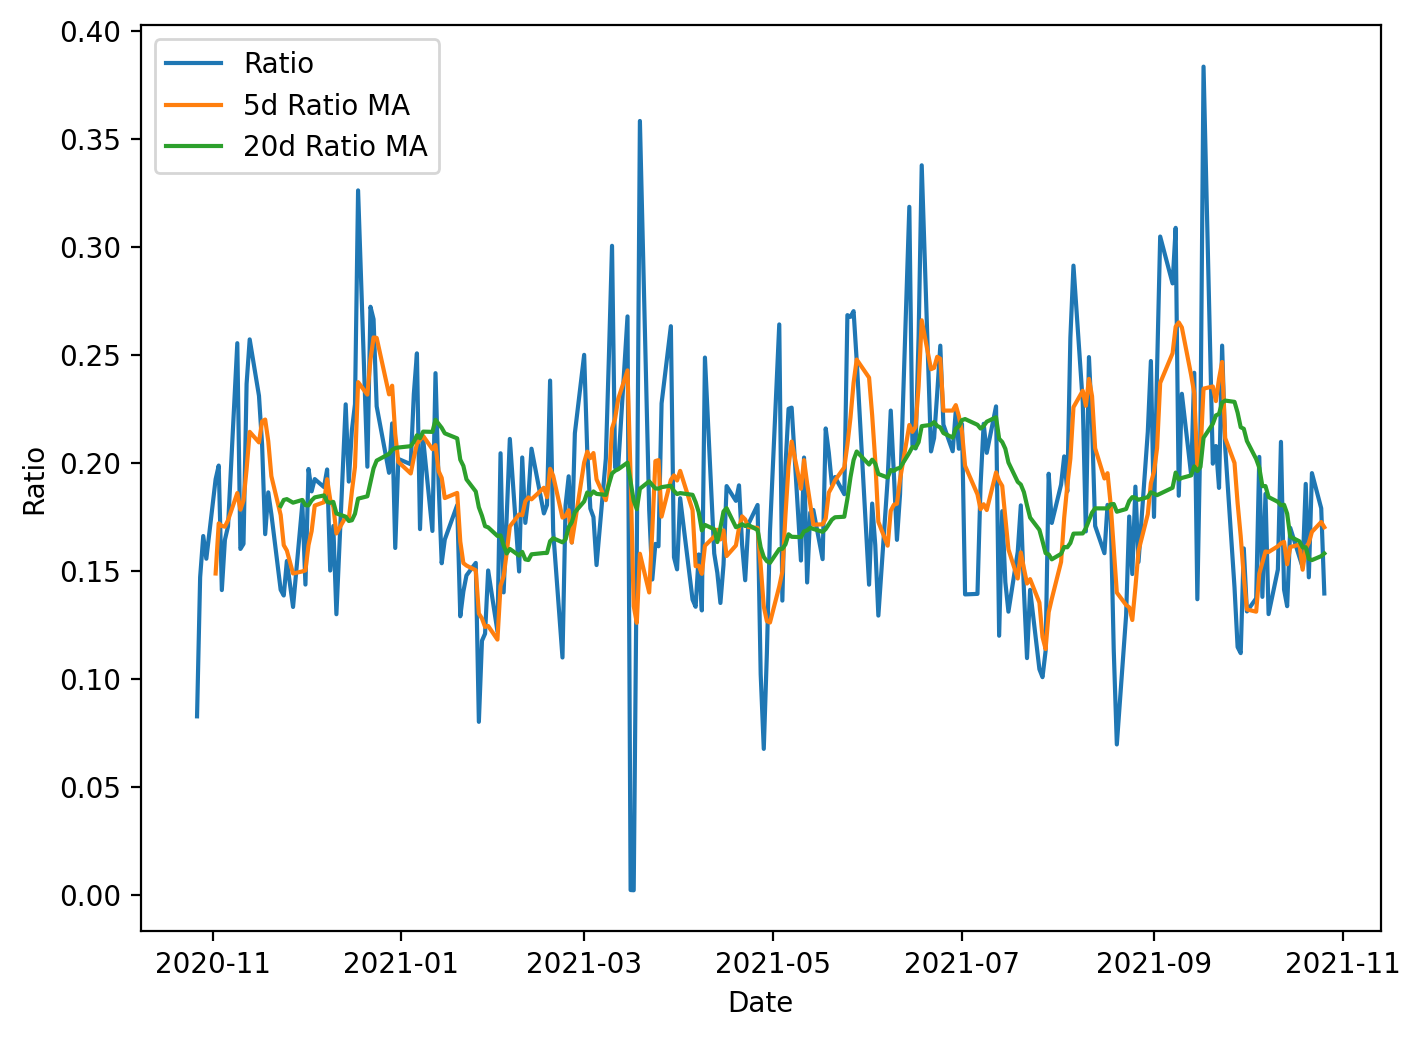

In [14]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

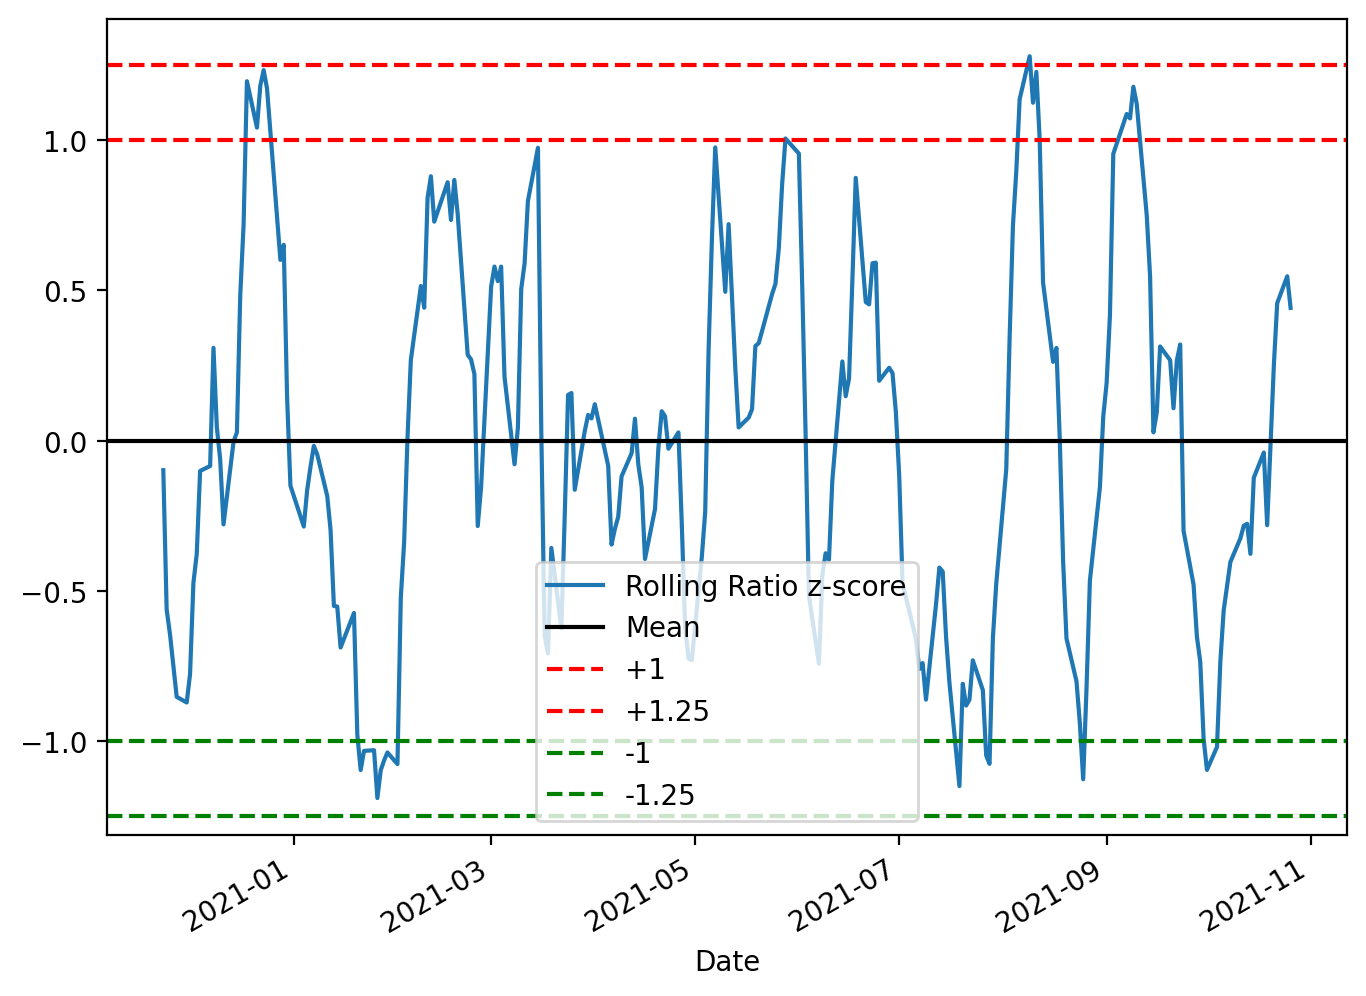

In [15]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

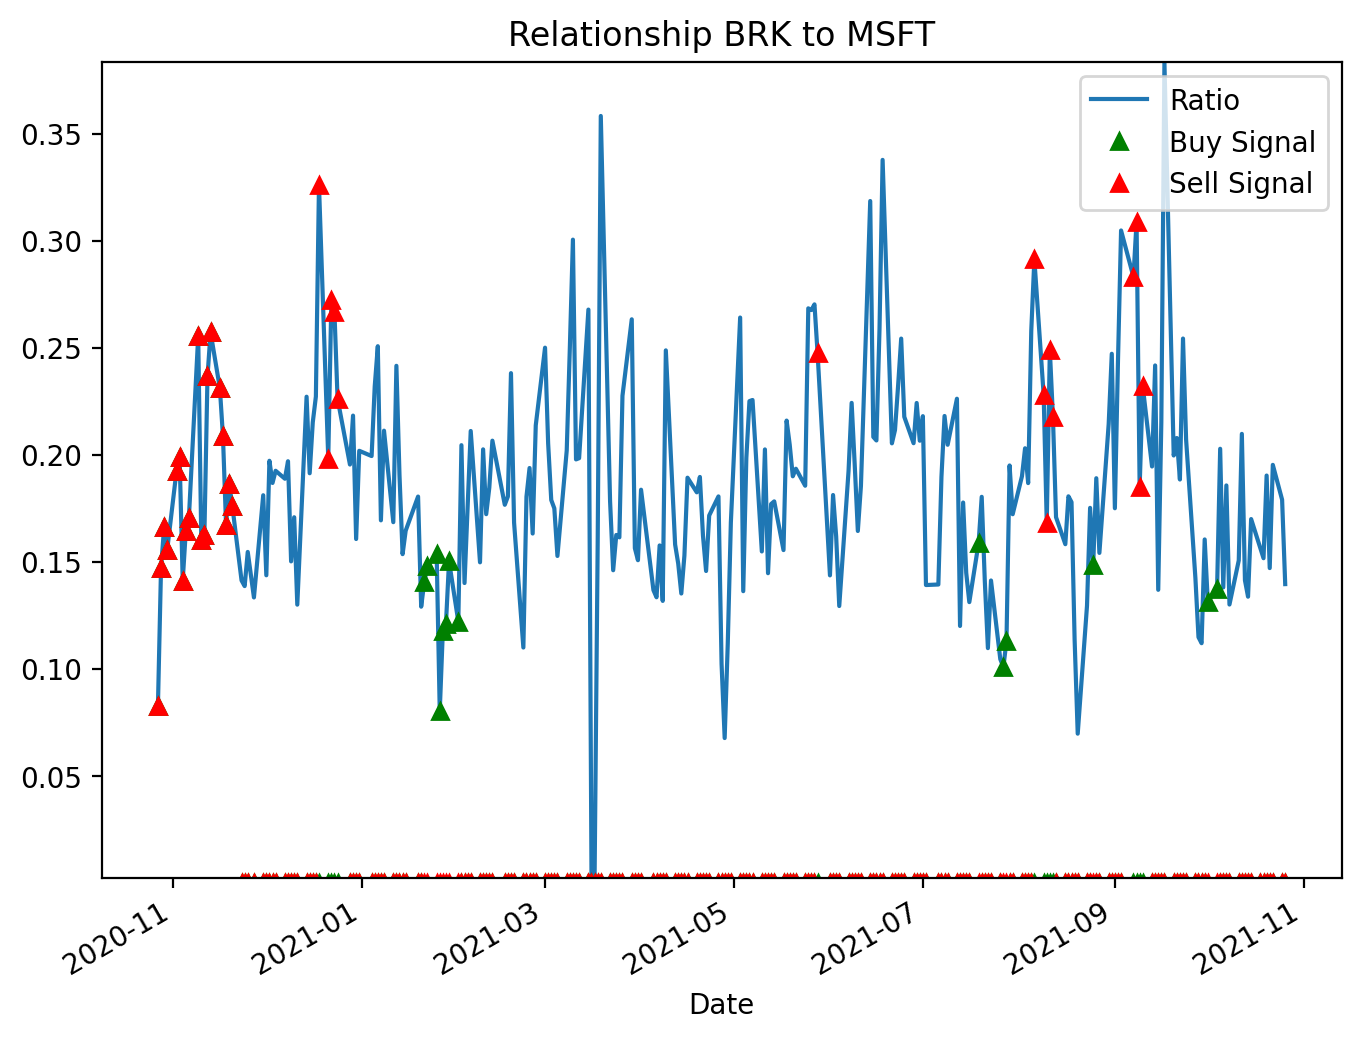

In [16]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship BRK to MSFT')
plt.show()

# Momentum (Trends are your friends)

# Valuation (Buy low, sell high)

# Sentiment (Buy the rumor, sell the news)

# Seasonality (Sell in May and go away)